<a href="https://colab.research.google.com/github/kevinCortial/graphlearning/blob/main/Product_Space/processing_PS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Graph Learning on Product Space </center></h1>

<center> Kévin CORTIAL et Taoufik JARMOUNI &nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp; Open Studio UCA IP / Atlas des Synergies Productives &nbsp;&nbsp;&nbsp; </center>

Product Space : 

Download : https://github.com/apachot/Knowhow_proximities/blob/main/input/HS_similarity_usingCF.csv

This graph represents the proximity of industrial know-how between the product classes of the HS nomenclature, independently of the country or territory observed. This graph was built by the analysis of thousands of websites of French companies to label the products they manufacture. From these collected data, a recommendation system, based on collaborative filtering, has allowed to establish links between the products of the HS nomenclature that have the strongest productive proximity.

**Package installation:**

In [1]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 35.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [12]:
pip install cdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.6/228.6 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 95.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.0/174.0 KB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.3 MB/s eta 0:00:00
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=e1f257f3ac3a8294abdc1c6fdcbc9d8da962946f7709af5c9ac01731b3440997
  Stored in directory: /root/.cache/pip/wheels/dc/25/8b/072b221a5cff4f04e7999d39ca1b6cb5dad70

**Chosen seed to test score calculations:**

In [3]:
from random import *
seed(35456)

**Graph importation (needs to be download first into the local drive):**

In [10]:
from google.colab import files
import io
import networkx as nx
import pickle

uploaded = files.upload()

#G = nx.read_gpickle(io.BytesIO(uploaded['graphOriginal.gpickle']))
G = pickle.load(io.BytesIO(uploaded['graphOriginal.gpickle']))

Saving graphOriginal.gpickle to graphOriginal (2).gpickle


**Louvain partition of the original graph:**

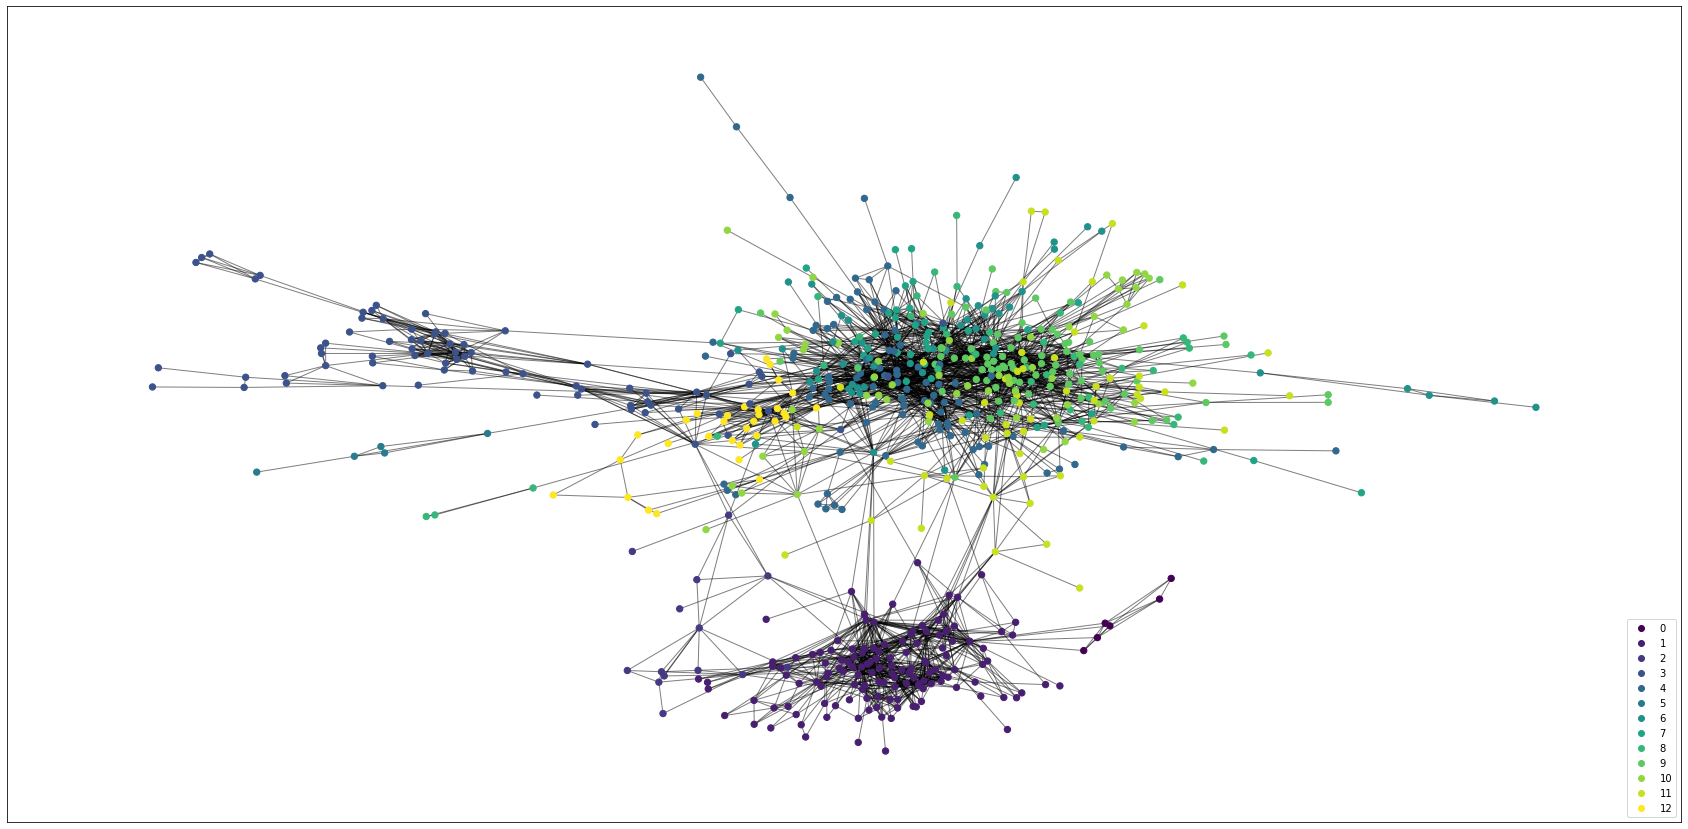

In [11]:
from community import community_louvain
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

def get_louvain_graph_from_G(G):
  # Louvain partition
  partition = community_louvain.best_partition(G)

  pos = nx.spring_layout(G)

  # Color the nodes according to their partition
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
  nodes = nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                        cmap=cmap, node_color=list(partition.values()))
  nx.draw_networkx_edges(G, pos, alpha=0.5)

  # Legend creation
  values = sorted(list(set(partition.values())))
  for v in values:
      # Make dummy scatterplot to generate labels
      plt.gca().scatter([],[], color=nodes.cmap(v/np.max(values)), label=v)
      
  plt.legend(loc='lower right')
  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return partition

#G = nx.read_gpickle("/content/drive/MyDrive/ColabNotebooks/graphOriginal.gpickle")
partition = get_louvain_graph_from_G(G)

**I-Louvain partition of the original graph**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


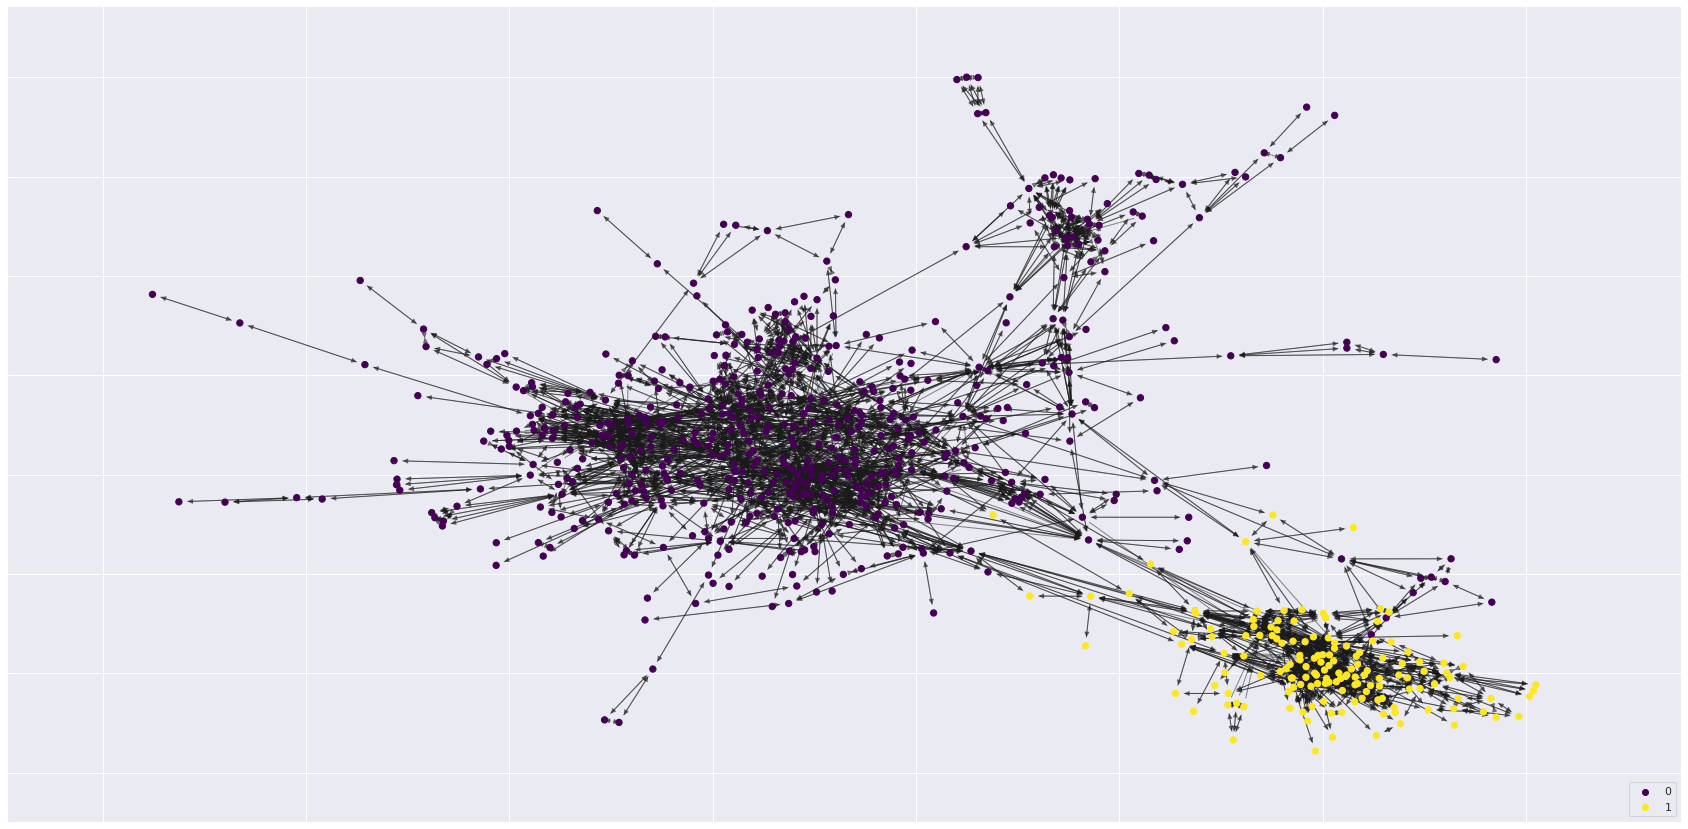

In [22]:
from google.colab import drive
from cdlib.algorithms import ilouvain
from cdlib.algorithms import eva
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pickle

drive.mount('/content/drive')

with open('/content/drive/MyDrive/ColabNotebooks/Custom_product_graph_nodata.gpickle', 'rb') as f:
  G_load = pickle.load(f)

with open('/content/drive/MyDrive/ColabNotebooks/ALLlabels_ilouvain.pkl', 'rb') as f:
  labels = pickle.load(f)

def get_ilouvain_graph_from_G(G):
  com = ilouvain(G_load, labels)

  test = com.to_node_community_map()
  dict_part = dict(test)

  for k, v in dict_part.items():
      dict_part[k] = int(v[0])

  cmap = cm.get_cmap('viridis', max(dict_part.values()) + 1)
  pos=nx.spring_layout(G_load)
  nodes = nx.draw_networkx_nodes(G_load, pos, dict_part.keys(), node_size=40,
                        cmap=cmap, node_color=list(dict_part.values()))
  nx.draw_networkx_edges(G_load, pos, alpha=0.5)

  # Legend creation
  values = sorted(list(set(dict_part.values())))
  for v in values:
      # Make dummy scatterplot to generate labels
      plt.gca().scatter([],[], color=nodes.cmap(v/np.max(values)), label=v)
  plt.legend(loc='lower right')

  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return dict_part

dict_part = get_ilouvain_graph_from_G(G_load)

---

**NLTK Stopwords importation:**

In [14]:
# This cell allows us to import stopwords so we can use them later on to clean up the products' descriptions
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words_fr = stopwords.words("french")
stop_words_en = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**CSV importation:**

In [16]:
import pandas as pd

url = 'https://raw.githubusercontent.com/kevinCortial/graphlearning/main/Product_Space/data/product_nomenclature_cleaned.csv'

df = pd.read_csv(url, delimiter = "|", dtype={'code_hs4': str})

**Wordcloud & word frequency of the products descriptions:**

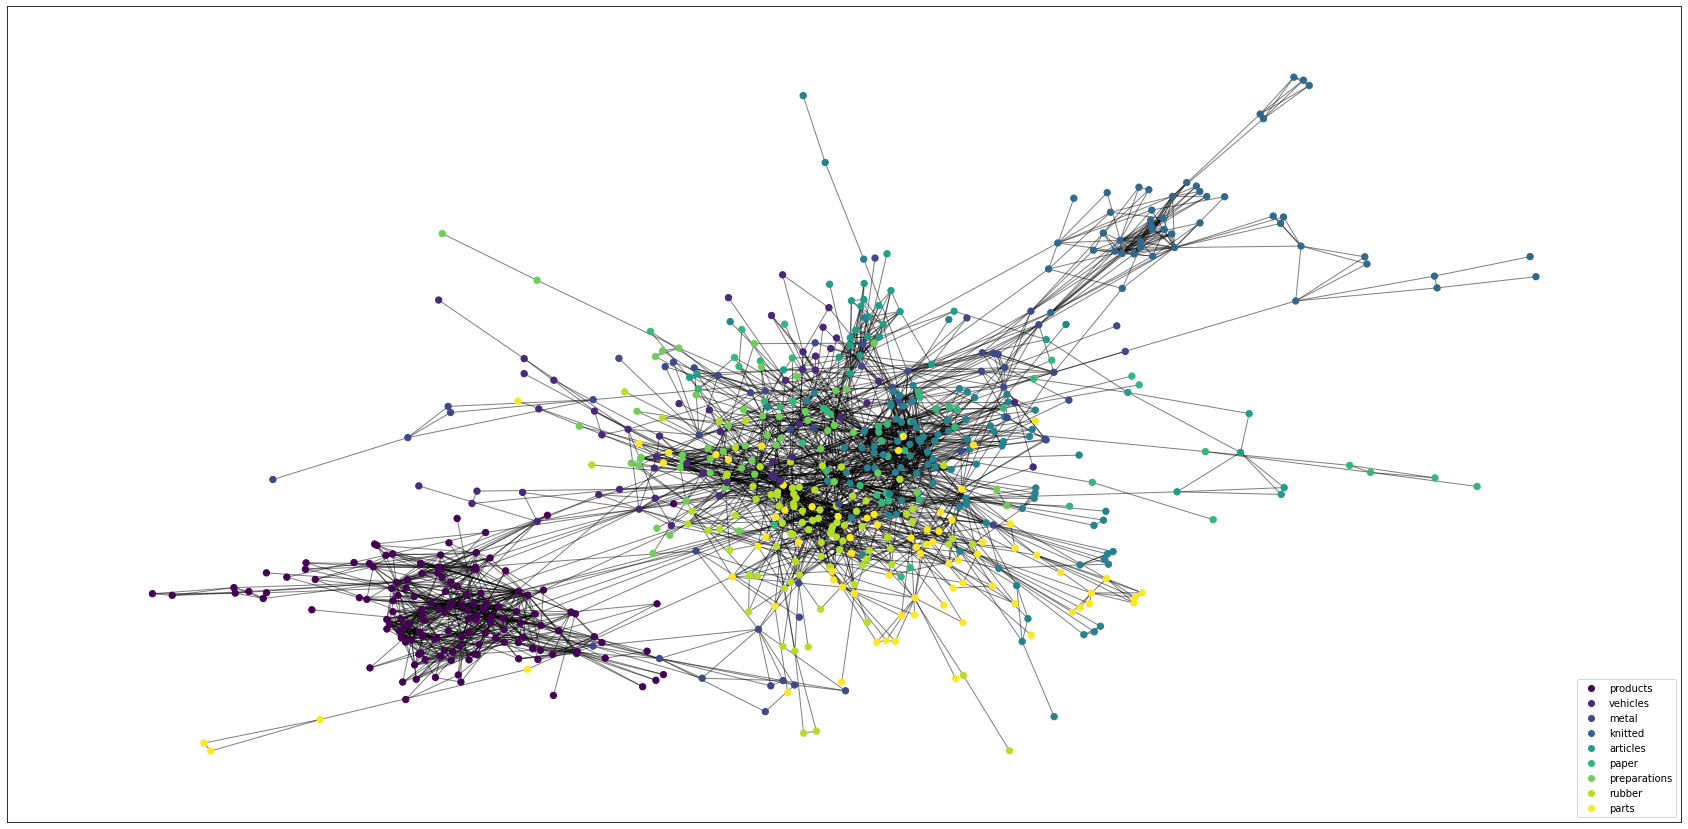

In [17]:
# This cell allows us to get the most frequent words in every cluster, by using the Counter library. Every cluster is made of a combination of all the member products' strings
# of course all those strings are cleaned afterwards thanks to a preset and customized stopword list.
# This can be done in both english and french, all its needed is to comment the two english lines and uncomment the french ones.
# This code can also show us wordclouds of each cluster, with the top 20 most frequent words of each one.
from community import community_louvain
from wordcloud import WordCloud
from collections import Counter
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

def english_processing(partition, df, stop_words_en, maximum, most_common_words):
  partition = replace_code_with_english_description(partition, df)
  most_common_words = get_english_most_common_words(stop_words_en, maximum, partition)
  return most_common_words


def french_processing(partition, df, stop_words_fr, maximum, most_common_words):
  partition = replace_code_with_french_description(partition, df)
  most_common_words = get_french_most_common_words(stop_words_fr, maximum, partition)
  return most_common_words


def replace_code_with_english_description(partition, df):
  for k in list(partition.items()):
    element = list(k)
    old_element = element[0]
    test = df.loc[(df['code_hs4'] == element[0]).idxmax(),'name_en']
    element[0] = test
    new_value = list(partition.items())
    partition[element[0]] = partition.pop(old_element)
  return partition


def replace_code_with_french_description(partition, df):
  for k in list(partition.items()):
    element = list(k)
    old_element = element[0]
    test = df.loc[(df['code_hs4'] == element[0]).idxmax(),'name_fr']
    element[0] = test
    new_value = list(partition.items())
    partition[element[0]] = partition.pop(old_element)
  return partition


def get_number_of_partitions(partition):
  new_val = partition.values()
  maximum = max(new_val)
  return maximum


def get_english_most_common_words(stop_words_en, maximum, partition):
  common_words_lst = []
  for i in range(0,maximum):
    first_category = [k for k,v in partition.items() if v == i]
    string_category = ' '.join(first_category)
    stop_words_en.extend(["(excl.", "whether", "<=", "kg)", "n.e.s.", "incl.", "thereof", "containing", "similar"])
    string_category = ' '.join([w for w in string_category.split() if w not in stop_words_en])
    #counts = Counter(string_category.split()).most_common(20)
    counts = Counter(string_category.split()).most_common(1)
    cat = dict(counts)
    res = list(cat.keys())[0]
    common_words_lst.append(res)
    #get_wordcloud(string_category)
  most_common_words.update(cat)
  return common_words_lst


def get_french_most_common_words(stop_words_fr, maximum, partition):
  for i in range(0,maximum):
    common_words_lst = []
    first_category = [k for k,v in partition.items() if v == i]
    string_category = ' '.join(first_category)
    stop_words_fr.extend(["(à.", "simil.", "autres", "non", "cm", "(à", "lexcl.", "(sauf", "autre", "<="])
    string_category = ' '.join([w for w in string_category.split() if w not in stop_words_fr])
    #counts = Counter(string_category.split()).most_common(20)
    counts = Counter(string_category.split()).most_common(1)
    cat = dict(counts)
    res = list(cat.keys())[0]
    common_words_lst.append(res)
    #get_wordcloud(string_category)
  most_common_words.update(cat)
  return common_words_lst


def get_legend_graph_from_G(G, most_common_words):
  # draw the graph
  pos = nx.spring_layout(G)
  # color the nodes according to their partition
  cmap = cm.get_cmap('viridis', max(old_partition.values()) + 1)
  nodes = nx.draw_networkx_nodes(G, pos, old_partition.keys(), node_size=40,
                        cmap=cmap, node_color=list(old_partition.values()))
  nx.draw_networkx_edges(G, pos, alpha=0.5)
  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  values = sorted(list(set(partition.values())))
  values = values[:-1]
  idx = 0
  for v in values:
      # make dummy scatterplot to generate labels
      plt.gca().scatter([],[], color=nodes.cmap(v/np.max(values)), label=most_common_words[idx])
      idx+=1   
  plt.legend(loc='lower right')
  plt.show()


partition = community_louvain.best_partition(G)

old_partition=partition.copy()

maximum = get_number_of_partitions(partition)

most_common_words = {}

# We can either process the english or french descriptions, we can also add an input field for the user to choose which one to use
most_common_words = english_processing(partition, df, stop_words_en, maximum, most_common_words)
#most_common_words = french_processing(partition, df, stop_words_fr, maximum, most_common_words)

get_legend_graph_from_G(G, most_common_words)

---

**CSV importation (Github):**

In [18]:
import pandas as pd

url_sector = 'https://raw.githubusercontent.com/kevinCortial/graphlearning/main/Product_Space/data/sector_for_nodes.csv'
url_label = 'https://raw.githubusercontent.com/kevinCortial/graphlearning/main/Product_Space/data/label_sector.csv'
url_clusters = 'https://raw.githubusercontent.com/kevinCortial/graphlearning/main/Product_Space/data/clusters.csv'

# dataframe that contains the sector for each product
df_sector = pd.read_csv(url_sector, delimiter = ",", dtype={'code_hs4': str})
# dataframe that contains all the 19 activity sectors and their description in french
df_label = pd.read_csv(url_label, delimiter = ",")
# Empty dataframe which will contain the number of matches
df_clusters = pd.read_csv(url_clusters, delimiter = "|")

**Comparison between activity sectors and found clusters:**

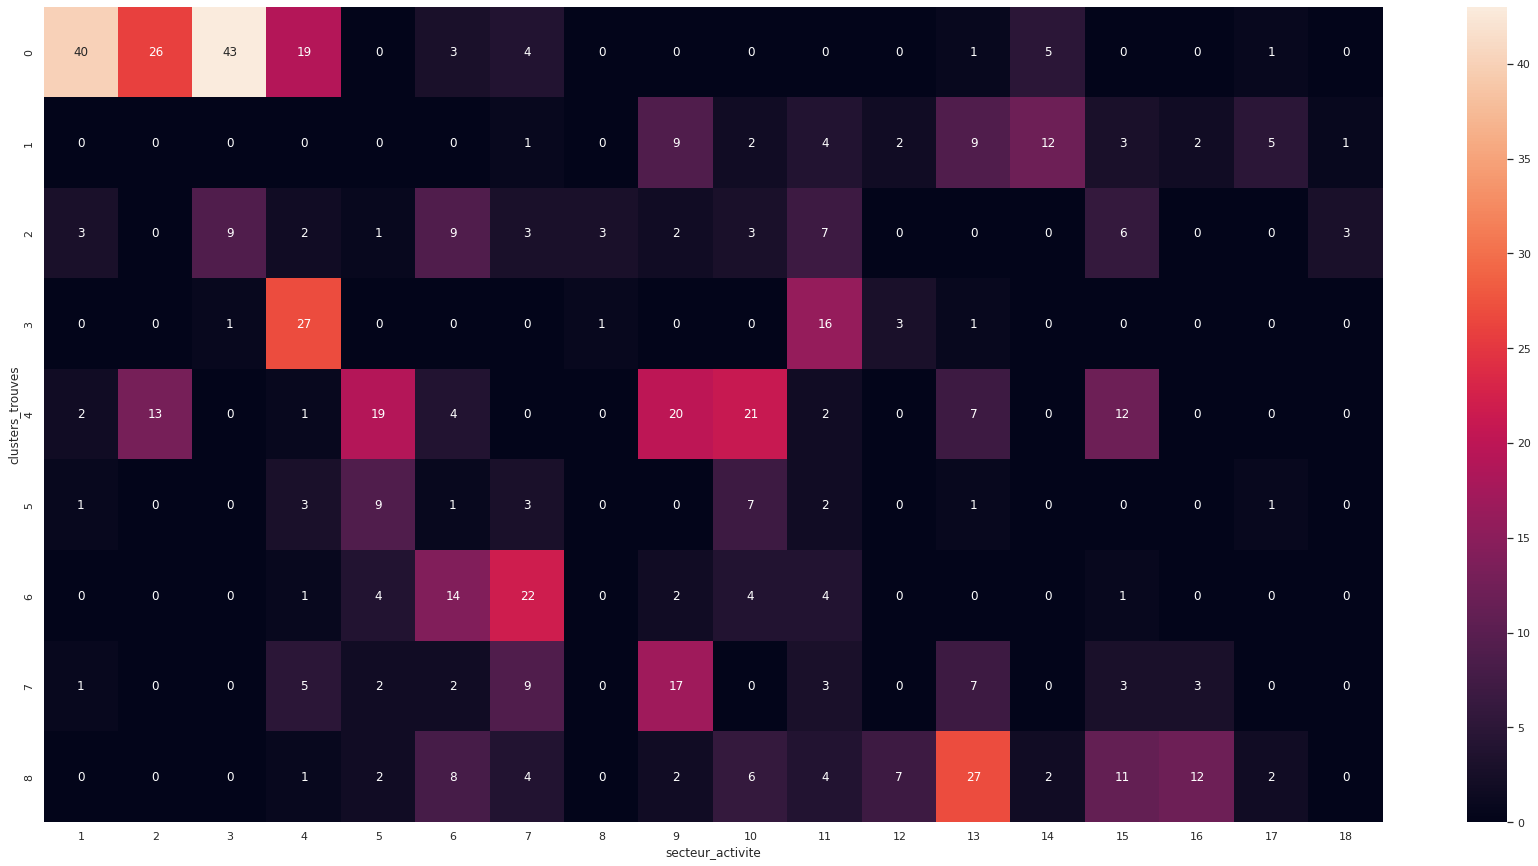

In [19]:
# This cell allows us to merge the two dataframes that contain premade activity sectors, and use compare each one of them with each cluster we found with Louvain
# The number of matches is then converted into an adjacency matrix which is later on used to create a heatmap
import pandas as pd
import seaborn as sns

def french_description_clean(df_merged):
  # Here we clean the french descriptions
  for i, row in df_merged.iterrows():
    split = row["name"].split("""fr'"=>""")
    split_name = split[1]
    df_merged.at[i,'name'] = split_name
    df_merged.at[i,'name'] = df_merged.at[i,'name'].replace('"','')
    df_merged.at[i,'name'] = df_merged.at[i,'name'].replace("'",'')
  return df_merged


def calculate_number_matches(df_merged):
  # Here we calculate the number of matches between each activity sector and our clusters
  idx = 0
  total_match = []
  for i in range(1,19):
    cluster_pascal = df_merged.loc[df_merged['id'] == i]
    code_cluster_pascal = list(cluster_pascal.code_hs4)
    for j in range(0, maximum):
      nb_match = 0
      code_cluster_nous = [key for key, value in old_partition.items() if value == j]
      for m in range(0, len(code_cluster_pascal)):
        for l in range(0, len(code_cluster_nous)):
          if code_cluster_nous[l] == code_cluster_pascal[m]:
            nb_match += 1
            break
      total_match.append(nb_match)
      df_clusters.at[idx,'clusters_trouves'] = j
      df_clusters.at[idx,'secteur_activite'] = i
      df_clusters.at[idx,'match'] = nb_match
      idx+=1
  return df_clusters


def get_heatmap_from_dataframe(df_merged, df_clusters):
  df_merged = df_merged.drop_duplicates(subset=['code_hs4', 'id'], keep='first')
  df = pd.crosstab(df_clusters.clusters_trouves, df_clusters.secteur_activite, values = df_clusters.match, aggfunc=np.sum, dropna=False)
  sns.set(rc = {'figure.figsize':(30,15)})
  sns.heatmap(df, annot=True)


df_merged_original = pd.merge(df_sector, df_label, on='id')

df_merged = french_description_clean(df_merged_original)


list_clusters = list(old_partition.keys())
df_merged = df_merged[df_merged['code_hs4'].isin(list_clusters)]

df_clusters = calculate_number_matches(df_merged)
  

get_heatmap_from_dataframe(df_merged, df_clusters)

**Comparison using metrics:**

Louvain vs Original

In [20]:
# We grab all the IDs of each line, to use afterwards for metric calculations (Activity Sectors)
from sklearn import metrics

list_id = df_merged['id'].tolist()
activity_sectors = list_id[:634]
print(activity_sectors)

# We grab all the IDs of each line, to use afterwards for metric calculations (Louvain)
label_louvain = list(partition.values())

# Score calculation between the clusters we found and the activity sectors
print(metrics.adjusted_rand_score(activity_sectors, label_louvain))
print(metrics.rand_score(activity_sectors, label_louvain))

print(metrics.adjusted_mutual_info_score(activity_sectors, label_louvain))
print(metrics.homogeneity_score(activity_sectors, label_louvain))
print(metrics.completeness_score(activity_sectors, label_louvain))
print(metrics.v_measure_score(activity_sectors, label_louvain))
print(metrics.fowlkes_mallows_score(activity_sectors, label_louvain))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

I-Louvain vs Original

In [21]:
from sklearn import metrics

label_ilouvain = list(dict_part.values())

# todo: find a better way to import the list (of categories from the product space) from the other google colab
activity_sector = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 19, 19, 19, 19, 19, 19, 19, 19, 19, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
label_ilouvain = label_ilouvain[:634]

print(metrics.adjusted_rand_score(label_ilouvain, activity_sector))
print(metrics.rand_score(label_ilouvain, activity_sector))

print(metrics.adjusted_mutual_info_score(label_ilouvain, activity_sector))
print(metrics.homogeneity_score(label_ilouvain, activity_sector))
print(metrics.completeness_score(label_ilouvain, activity_sector))
print(metrics.v_measure_score(label_ilouvain, activity_sector))
print(metrics.fowlkes_mallows_score(label_ilouvain, activity_sector))

0.04076000300137176
0.2981894837561858
0.22265628593818443
0.8927035705457238
0.1314301113231363
0.22912659105456426
0.30181940163844573
